In [26]:
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
class KNNClassifier:
    def __init__(self, n_neighbours=3):
        self.n_neighbours = n_neighbours
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self,X_test):
        predictions = []
        for x in X_test:
            
            distances = []
            for i, x_train in enumerate(self.X):
                dist = np.sqrt(np.sum((x - x_train)**2))
                distances.append((i,dist))
                
            distances.sort(key=lambda x: x[1])
            
            knn = [self.y[i] for i, _ in distances[:self.n_neighbours]]
            
            prediction = max(set(knn), key=knn.count)
            predictions.append(prediction)
        return predictions

In [35]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
model = KNNClassifier()
model.fit(X_train, y_train)

In [37]:
pred = model.predict(X_test)

In [38]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[15  0  0]
 [ 0 13  1]
 [ 0  1 15]]


In [39]:
accuracy_score(y_test, pred)

0.9555555555555556

<AxesSubplot:>

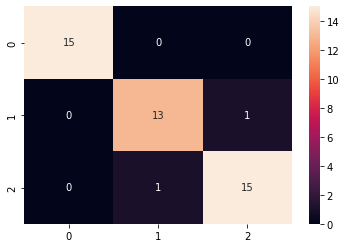

In [40]:
sns.heatmap(cm, annot=True)